<a href="https://colab.research.google.com/github/Rohianon/Tweeter-Mining-101./blob/master/Twitter_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The $6^{th}$ June Case Using tweeteR.

Of the many Kenyan Twitter users, only a small fraction has realized the benefits of text analysis. Sitting down at my parlor and thinking of what to do during that rainy day of June 6th, 2020. I find my laptop and voila! All I could think of was the trending topics on twitter. Instead of jumping to `twitter.com`, I find my way out to `twitter developers page` only to realize that I was not actively using the [token and keys](http://docs.inboundnow.com/guide/create-twitter-application/). 

The journey of a thousand miles begins with a step. Meeting [Cyril](https://ke.linkedin.com/in/cyrilmichino) was one of the most awesome thing during my data science journey. That story for another day but at his guidance was this idea nourished to write this as my first article. Am not a perfect one anyway, but under the influence of  bloggers [Catherine Gitau](https://categitau.com/), [Cyril Michino](https://medium.com/@cyrilmichino) and [Margret Nyawira](https://medium.com/@margaretkaraba), I am becoming one. 

With this inspiration, here comes the first article regarding Natural Language processing. Having gained some experience in R and Python and what the two languages can do, R got an upper hand in this article though without bias on any of the languages. NLTK, a package in Python provides an awesome environment to work with NLP. I encourage you to delve deep into this article and that at a minimum should you also walk through the code herein on your PC. Social Media Intelligence is fun, and the hotter the topic the more fun you enjoy whilst gathering insight. 

## Pre-requisites.

- Have R or Rstudio installed or if not visit the google colab page for a cloud Notebook(I encourage this).
- You need to acquire a Twitter account to create an application to extract tweets. 

## Installing the Required Packages.

In [0]:
install.packages('twitteR')
install.packages('RCurl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘rjson’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [0]:
library(devtools)
library(httr)
library(twitteR)
library(RCurl)
require(lubridate) #deals with dates and time
options(warn = -1)

## The OAuth Implementation.

[Here](http://docs.inboundnow.com/guide/create-twitter-application/) is how to set up your twitter Developer account in order to gain the OAuth Credentials.

You can input your tokens and secrets here and run the code to start the mining process. 

In [0]:
access_token <- readline('Please enter your access API token\t:')
access_secret <- readline('Please enter your access API secret\t:')
consumer_key <- readline('Please enter your consumer API key\t:')
consumer_secret <- readline('Please enter your consumer API secret\t:')

# The Authentification process.
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret) #errorless

At bare minimum, the `readline()` function will require an input of your `access_token`, `access_secret`, `consumer_key` and `consumer_secret`. From you developer account you can just copy and paste these credentials. 
`'[1] "Using direct authentication".'`

## Data Extraction.
Let's begin the course. We can now extract data from twitter. Having our api set helps us easily access the structured data from twitter. As noted previously, the format with which the data comes in is what we have learned from R data types eg vectors,lists, dataframes just to mention but a few.

A few elements discused here include user timelines and trending topics. Much more functions can be found [here](https://github.com/SMAPPNYU/smappR) so that you can play with twitter data and its functionality.

1. Extract the most trending topics in kenya. 
We will use the `getTrends()` function in ordder to extract the twitter trends based on an input parameter (WOEID). WOEID - (Where On Earth Identifier) helps identify any feature on earth. Thus it can be used to extract most trending topics on any part of the world. 

Let's see the code.

In [0]:
#extract trends using getTrends Function
kenya_id <- 23424863
trending <- getTrends(kenya_id)

In [0]:
tr <- dim(trending)[1]
#today
date <- as.POSIXct(Sys.Date())
cat('As of ',format(date, format="%B %d %Y"),' at ', \
format(now('UTC-03:00'), format="%H:%M"), ', there were ', \
tr, ' trending topics in Kenya')

As of  June 06 2020  at  13:24 , there were  50  trending topics in Kenya

As of  June 06 2020  at  12:01 , there were  50  trending topics in Kenya. The code chunk above needs some explanation. 
- The `dim()` is used to find the shape of our dataframe object initially created as trending. The number of rows comes first hence `[1]` is used.
- The `as.POSIXct` is used for working with date objects so that R can identify dates easily. Similarly `as.Date()` does the same formating work.
-  R enables as to get the time at which we perfomed the mining from our twitter application. 
- concatinating the string together with the date-time formats using the `cat()` helps to display the number of trending topics in Kenya on 6th June 2020. 

2. Extract tweets from a particular user.

In [0]:
trumps_tweets <- userTimeline('FLOYD', 100) #100 tweets from Floyd's timeline.

ERROR: ignored

Now that we already have our trending topics, the #UhuruDontLiftLockdown featured among the trending topics during the artical development process.

In [0]:
library(tidyverse) #for data wrangling

trending %>% head 

,name,url,query,woeid
,<chr>,<chr>,<chr>,<chr>
1,#UhuruDontLiftLockdown,http://twitter.com/search?q=%23UhuruDontLiftLockdown,%23UhuruDontLiftLockdown,23424863
2,#hbrfanzone,http://twitter.com/search?q=%23hbrfanzone,%23hbrfanzone,23424863
3,#teenrepublikntv,http://twitter.com/search?q=%23teenrepublikntv,%23teenrepublikntv,23424863
4,Fellow Kenyans,http://twitter.com/search?q=%22Fellow+Kenyans%22,%22Fellow+Kenyans%22,23424863
5,#wanjohi,http://twitter.com/search?q=%23wanjohi,%23wanjohi,23424863
6,#RogaRoga,http://twitter.com/search?q=%23RogaRoga,%23RogaRoga,23424863


Now the next procedure is to major into the topic #UhuruDontLiftLockdown where by we create a dataframe containing all these tweets.

In [0]:
june6th <- searchTwitter('#UhuruDontLiftLockdown', n=4000)
class(june6th)

[1] "list"

We got a list of 1000 tweets which we can now convert to a dataframe so as to begin the data

In [0]:
june6th_df <- twListToDF(june6th)
dim(june6th_df)
names(june6th_df)

[1] 4000   16

[1] "text"          "favorited"     "favoriteCount" "replyToSN"    
 [5] "created"       "truncated"     "replyToSID"    "id"           
 [9] "replyToUID"    "statusSource"  "screenName"    "retweetCount" 
[13] "isRetweet"     "retweeted"     "longitude"     "latitude"

## Data Cleansing.

Wisdom of the Crowds dictates that 80% of the time should be used for wrangling and cleansing while modelling takes only 20%. Thus the main objective here is to clean the unstructured dataset we acquired from twitter using the twitteR API. 

Remember, informal communication makes twitter data to be higly unstructured. Noise in the data is highly depicted eg the typos, poor grammar, Stopwords, emoji usage, and even sometimes URLs. 

For starters like I am, the following definitions give a hint of what we are going to do.
- Corpus - Refers to a list of text, ie the column named text in our june6th_df.
- Document - Refers to the separate text blocks in our corpus list. 
- Term - This refers to the individual wordings also known as unigrams. In laymans language, at every split after a whitespace do we find our term.

A bunch of packages will be required for this process.  Some important ones to be mention include `tm` for text mining and `corpus` that is used for vectorization. Other packages will need to be installed first.

In [0]:
#install.packages('httpuv')
#install.packages('tm')
#install.packages('corpus')
#install.packages('SnowballC')
#install.packages('wordcloud')
#install.packages('boot')
install.packages('wordcloud2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library("dplyr") #for data wrangling
library("base64enc") 
library("httpuv") # 
library("tm")  # to convert tweets to term frequency matrix
library("corpus") # for vectorization
library("SnowballC") # to stem the tweet text
library("wordcloud")
library("wordcloud2")
library("boot")
library("RColorBrewer")

Now that we have everything set up and ready, let us begin by vectorizing our dataset.

In [0]:
june6th_corpus <- june6th_df %>%
    select(text) %>%
    VectorSource() %>%
    Corpus()

Well, it seems there is a high usege of [emoticons](https://en.wikipedia.org/wiki/List_of_emoticons) that R explicitly displays. However, some of them can not be properly displayed calling for a drop. The following code chuck show us how we can drop out the unnecessary emoticons.  

In [0]:
june6th_corpus <- tm_map(june6th_corpus, function(x) iconv(enc2utf8(x), sub = "byte"))


In this paper however, we will not discuss much on what `tm` library can do but you can check the documentation from [here](https://cran.r-project.org/web/packages/tm/tm.pdf) and likewise for [SnowballC](https://cran.r-project.org/web/packages/SnowballC/SnowballC.pdf). Just note that the use of `%>%` may not be neccessary but it beautifies our code.

In [0]:
june6th_corpus <- june6th_corpus %>%
    tm_map(removeNumbers) %>%
    tm_map(removePunctuation) %>%
    tm_map(stripWhitespace) %>%
    tm_map(tolower) %>%
    tm_map(removeWords, c(stopwords('english'),'will')) %>%
    tm_map(PlainTextDocument)

Further processing can be done to remove unnecessary urls, hashtags, mentions etc. Some emoticons which were not previously removed will be removed using the `gsub` functions used for regular experssions. 

In [0]:
Textprocessing <- function(x)
  {gsub("http[[:alnum:]]*",'', x)
  gsub('http\\S+\\s*', '', x) ## Remove URLs
  gsub('\\b+RT', '', x) ## Remove RT
  gsub('#\\S+', '', x) ## Remove Hashtags
  gsub('@\\S+', '', x) ## Remove Mentions
  gsub('[[:cntrl:]]', '', x) ## Remove Controls and special characters
  gsub("\\d", '', x) ## Remove Controls and special characters
  gsub('[[:punct:]]', '', x) ## Remove Punctuations
  gsub("^[[:space:]]*","",x) ## Remove leading whitespaces
  gsub("[[:space:]]*$","",x) ## Remove trailing whitespaces
  gsub(' +',' ',x) ## Remove extra whitespaces
  gsub("[^\x01-\x7F]", "",x) ## Remove non-ASCII characters
}

In [0]:
june6th_corpus <- tm_map(june6th_corpus, Textprocessing)

Another definition comes. What do understand by **Term Document Matrix**? As it is accronymed tdm, it refers to a two dimensional matrix consisting of terms used in a corpus list/document in each cell. Mathematically, it is an $(i,j)$ representatio of the frequency of term $i$ in the document $j$. It is easily created using the function below:

In [0]:
june6th_tdm <- june6th_corpus %>%
    TermDocumentMatrix(control = list(
        stemming=FALSE # no stemming
    )) %>%
    as.matrix()

In [0]:
june6th_tdm[1:3]

[1]  1  2 18

## Visualizing Social Web Data.

A good instructor begins from the known to the unknow. For this article's sake, let us begin from visualizations using histograms first before we move on to a...

We can be able to build a wordle-esque word cloud. That's a heavy term that can make one's head burst yet easy after implementation.

In [0]:
# creating another document term matrix without conversion to a matrix.
june6th_dtm <- june6th_corpus %>%
    DocumentTermMatrix(control = list(
        wordlengths = c(1,Inf),
        stemming=FALSE # no stemming
    ))
Low_freq_terms <- findFreqTerms(june6th_dtm, lowfreq = 50)
head(Low_freq_terms)
High_freq_terms <- findMostFreqTerms(june6th_dtm)
head(High_freq_terms)

[1] "address"                     "againnuhurudontliftlockdown"
[3] "albertojanuzaj"              "along"                      
[5] "ama"                         "anafungua"

$`1`
 uhurudontliftlockdown              president                  uhuru 
                  1427                    789                    630 
               kenyans               kenyatta nuhurudontliftlockdown 
                   506                    386                    308

Lets us visualize the frequent terms.

In [0]:
termFreq <- colSums(as.matrix(june6th_dtm))
termFreq <- subset(termFreq, termFreq >= 150)
df <- data.frame(term=names(termFreq),freq=termFreq)
df


,term,freq
,<fct>,<dbl>
address,address,210
buy,buy,151
curfew,curfew,184
fellow,fellow,169
good,good,180
house,house,172
juneth,juneth,223
kamwana,kamwana,189
kenyans,kenyans,506


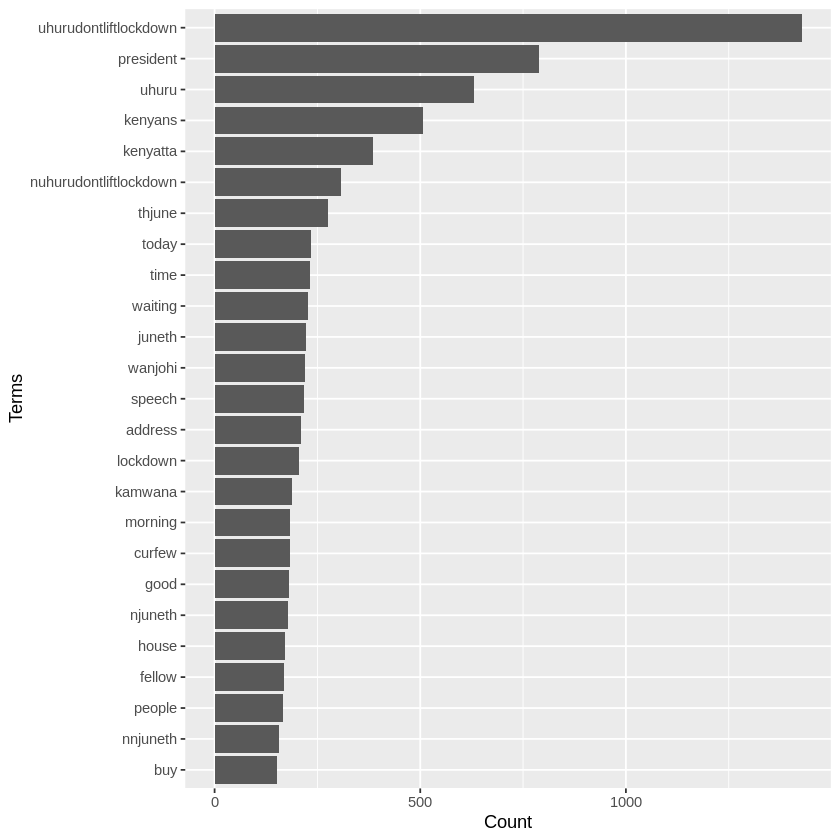

In [0]:

ggplot(df,aes(x=reorder(df$term, +df$freq), y=df$freq)) + 
geom_bar(stat = "identity") +
xlab("Terms") + 
ylab("Count") + coord_flip()


In [0]:
# Word frequencies visualization
freqs <- rowSums(june6th_tdm)

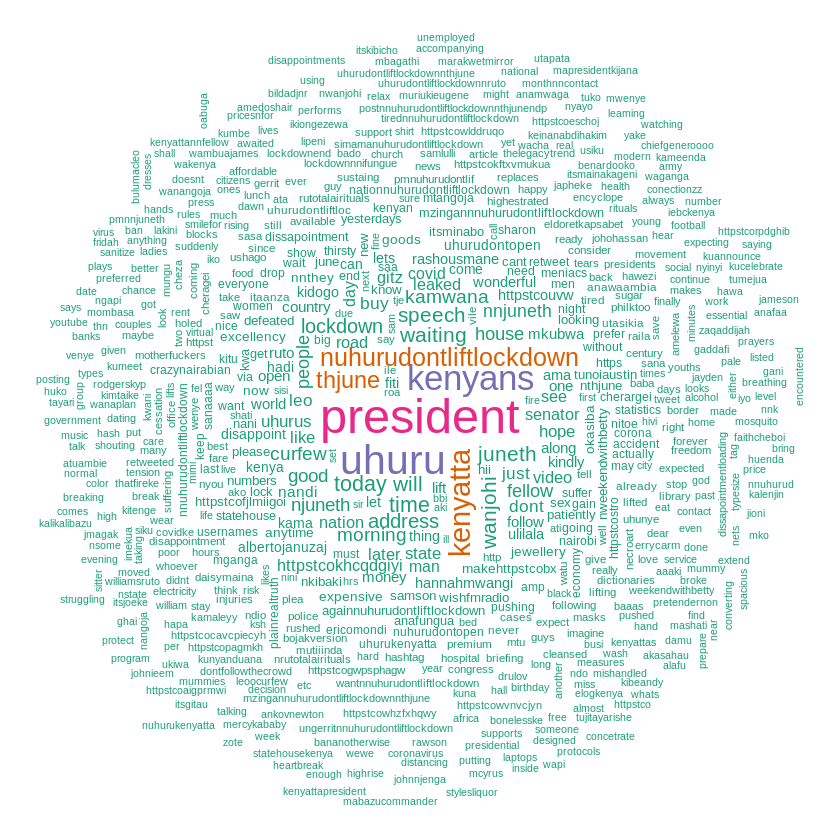

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE,\
 min.freq = 10,colors = brewer.pal(6, "Dark2"))

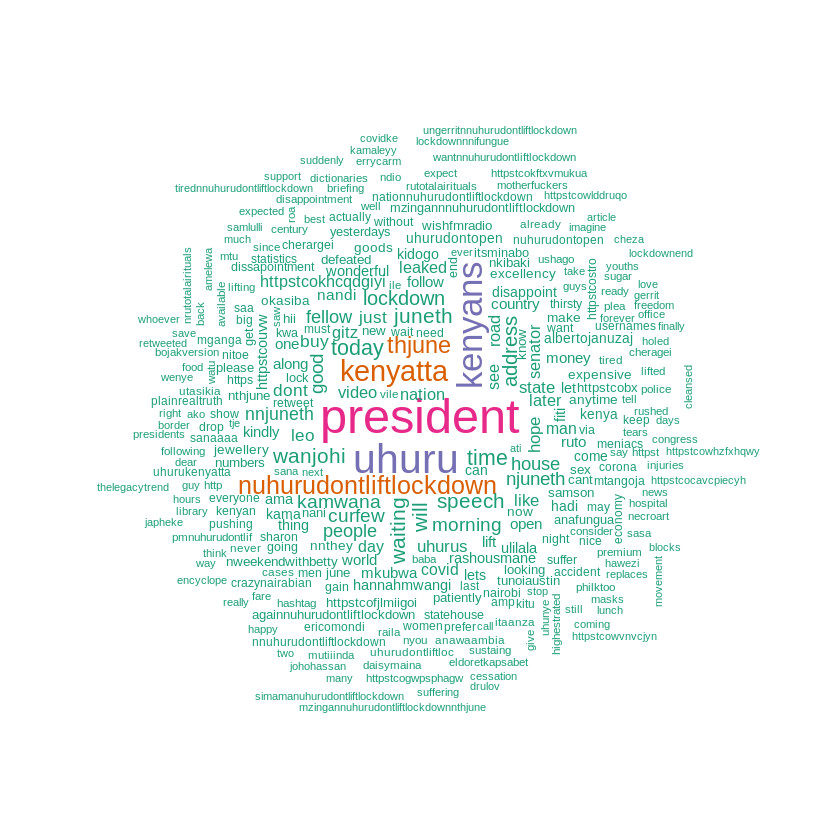

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE, min.freq = 20, colors = brewer.pal(6, "Dark2"))

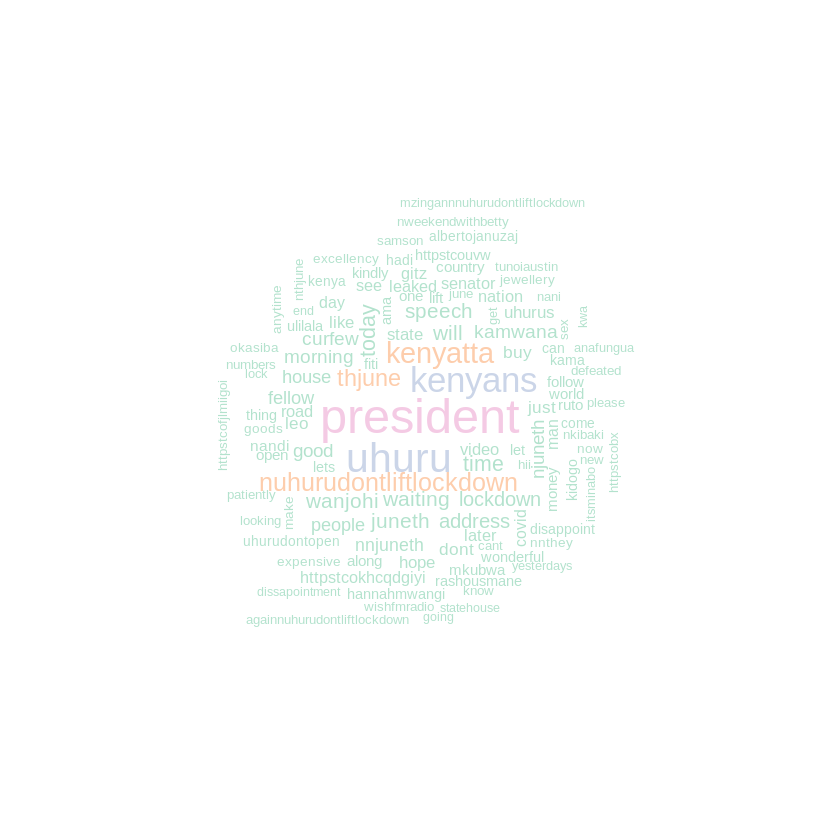

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE, min.freq = 50, colors = brewer.pal(6, "Pastel2"))

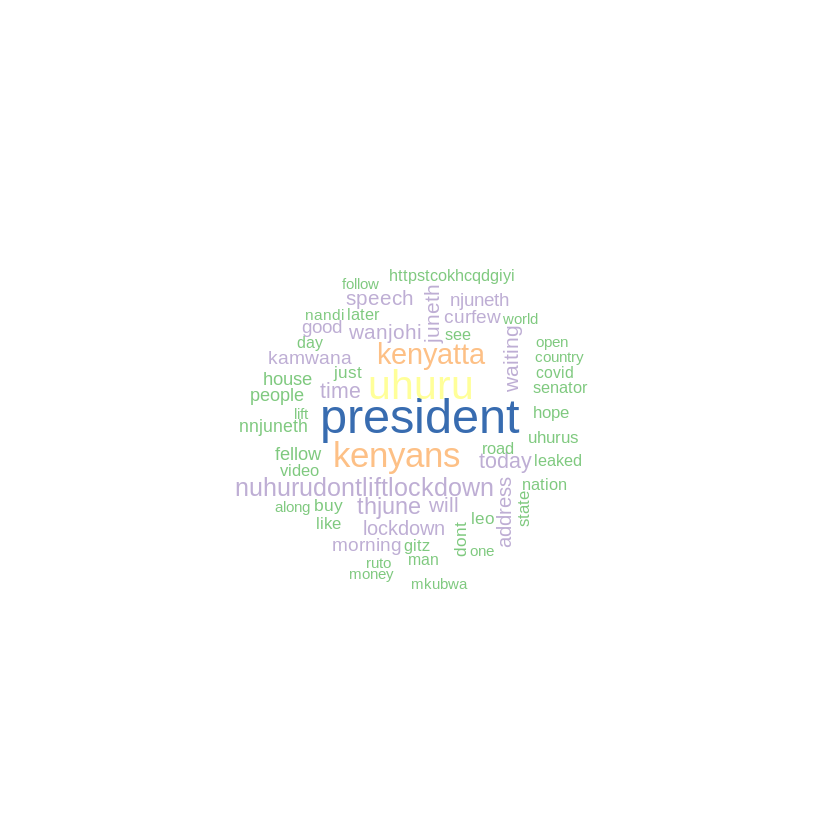

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE, min.freq = 100, colors = brewer.pal(20, "Accent"))

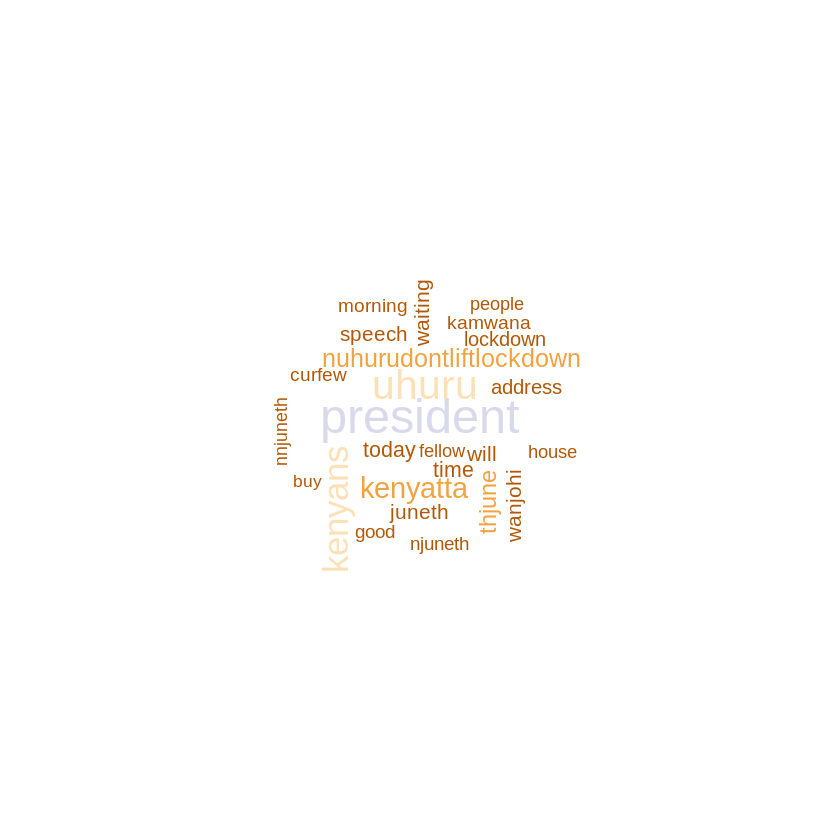

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE, min.freq = 150, colors = brewer.pal(6, "PuOr"))

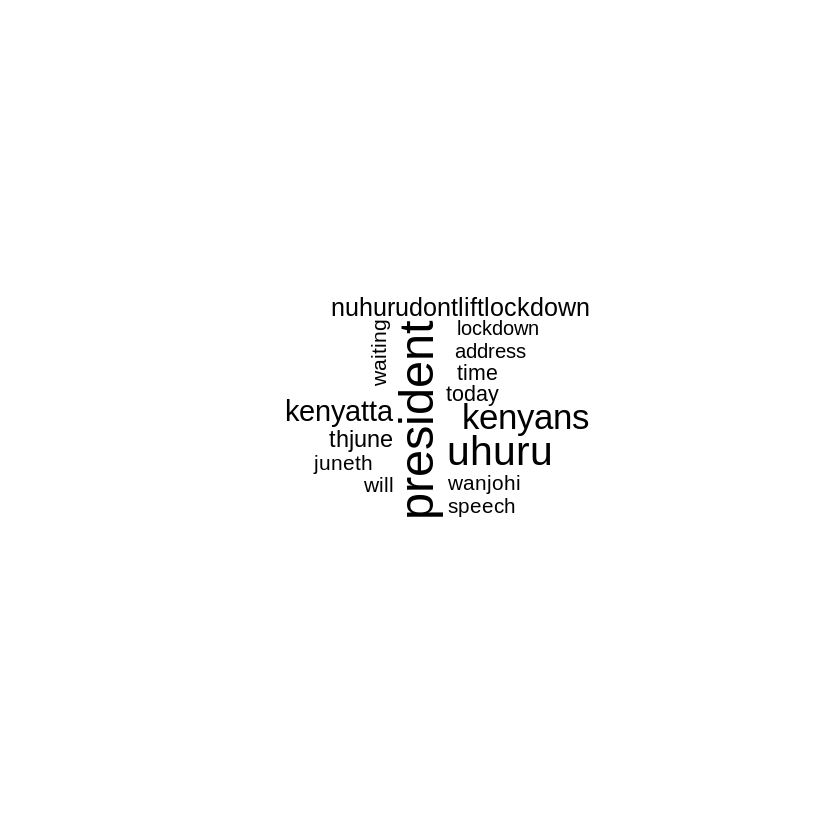

In [0]:
wordcloud(names(freqs), freqs, random.order = FALSE, min.freq = 200)

# Conclusion. 

As depicted by the whole twitter analysis process, the #uhurudontliftlockdown  was the number one kenya's trending in twitter. The wordcloud and the bargraph show that nuhurudontliftlockdown was the most frequently used word. Many kenyans tweeted about the speech that was to be made by the President Uhuru Kenyatta on the 6th June concerning the lockdown. An assignment for you is to try and figure out why the words `time`, `address`, `today` and `wanjohi` were used more than 200 times. 


Now that we've started, let's keep going.
Stay tuned and be prepared for deeper tweeter analytics using Machine learning methods such as Principal Component Analysis and Multidimensional Scaling. I believe that nothing in this world is difficult and in the same spirit we will walk through this.

Thank  you for reading this article. In case of any comments, compliments, and criticism you are welcome. Find me on twitter [@anon_rohi](https://twitter.com/anon_rohi), [rpubs](https://rpubs.com/RohiAnon) or on [linked in](https://www.linkedin.com/in/rohi-anon-38a026167/). You can also find [my github page](https://github.com/Rohianon).  All the best as continue coding